#Loan Approval

---
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

We will use two datasets: the **train.csv** and **test.csv** files

Combine the two dataset in order to apply the same preprocessing steps in both dataframes

In [25]:
df_train=pd.read_csv('/content/test.csv')
df_test=pd.read_csv('/content/test.csv')
df=df_train.append(df_test)
df.head()

<ipython-input-25-aa1bc6003e9c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002648,Male,Yes,0,Graduate,No,2130,6666,70.0,180,1.0,Semiurban,N
1,LP002652,Male,No,0,Graduate,No,5815,3666,311.0,360,1.0,Rural,N
2,LP002659,Male,Yes,3+,Graduate,No,3466,3428,150.0,360,1.0,Rural,Y
3,LP002670,Female,Yes,2,Graduate,No,2031,1632,113.0,480,1.0,Semiurban,Y
4,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800,123.0,360,0.0,Semiurban,N


# 4. Exploratory Data Analysis


**Question 1:** Use the shape function to check the dimensions of your dataframe

In [26]:
Raw = df.shape[0]
Column = df.shape[1]
print("The number of row in dataframe is : {} , and the number of column is : {}".format(Raw,Column))
# df.shape

The number of row in dataframe is : 202 , and the number of column is : 13


##### Using the function info(), we can check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 100
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            202 non-null    object 
 1   Gender             196 non-null    object 
 2   Married            202 non-null    object 
 3   Dependents         196 non-null    object 
 4   Education          202 non-null    object 
 5   Self_Employed      192 non-null    object 
 6   ApplicantIncome    202 non-null    int64  
 7   CoapplicantIncome  202 non-null    int64  
 8   LoanAmount         194 non-null    float64
 9   Loan_Amount_Term   202 non-null    int64  
 10  Credit_History     188 non-null    float64
 11  Property_Area      202 non-null    object 
 12  Loan_Status        202 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 22.1+ KB


**Question 2:** Which Columns contain Missing Values?

Analysis: Gender, Dependents , Self_Employed , LoanAmount And Credit_History

Becuse the number of raw is 202 and non-null less than it

##### Using the function describe(), we can check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,202.000000,202.000000,194.000000,202.000000,188.000000
mean,4928.277228,2047.297030,154.948454,336.475248,0.819149
std,3610.664580,5347.087767,96.633743,73.045558,0.385922
min,416.000000,0.000000,9.000000,36.000000,0.000000
25%,2894.000000,0.000000,102.000000,360.000000,1.000000
50%,3652.000000,1032.000000,132.000000,360.000000,1.000000
75%,5800.000000,2306.000000,182.000000,360.000000,1.000000
max,19484.000000,41667.000000,600.000000,480.000000,1.000000


**Question 3:** Which feature is not actually numerical and yet was included in the above statistical description?

Analysis:

Might be 'Loan_Amount_Term' feature is included in the statistical description, but it is not actually a numerical feature in the traditional sense.

In [29]:
np.sort(df.Credit_History.unique())

array([ 0.,  1., nan])

**Question 4:** Write the code to get unique values of the Loan_Amount_Term variable and sort the values

Loan_Amount_Term is a variable of numerical discrete data type

In [30]:
#طريقة لحساب القيم الفريدة
#  df['Loan_Amount_Term'].value_counts()

# طريقة ثانية لحساب القيم الفريدة
# len(df['Loan_Amount_Term'].unique())

# طريقة لترتيب قيم العمود
# sorted(df['Loan_Amount_Term'])

# numpy طريقة لترتيب القيم الفريدة للعمود ب
# np.sort(df.Loan_Amount_Term.unique())

# numpy طريقة ثانية لترتيب القيم الفريدة للعمود ب
unique_sorted_values = sorted(df['Loan_Amount_Term'].unique())
print(unique_sorted_values)


[36, 84, 180, 240, 360, 480]


#### Remove Na and create a density graph

<ipython-input-8-972ad0c805d5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['LoanAmount']);


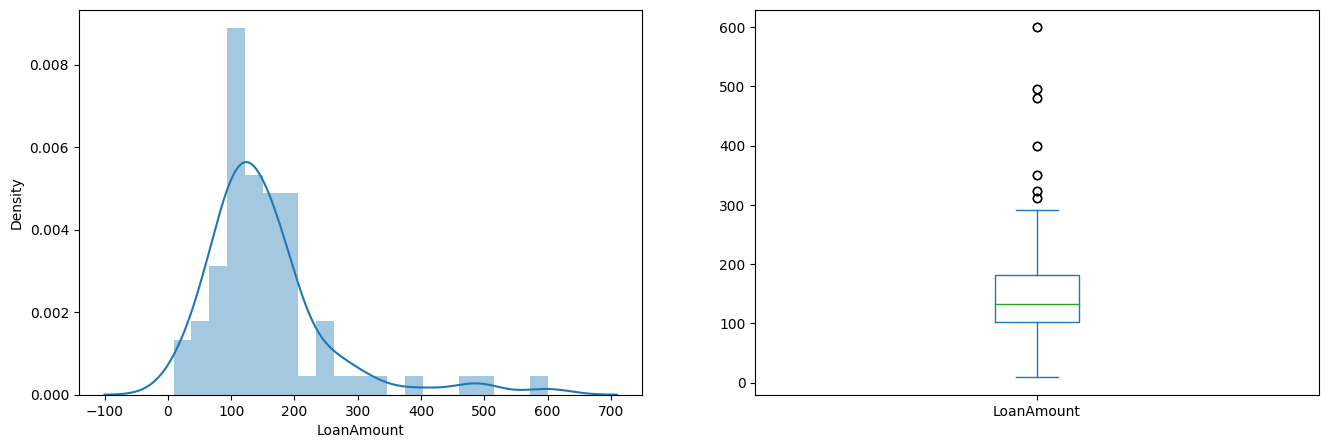

In [8]:
plt.figure(1)
plt.subplot(121)
removeNA_df=df.dropna() # we need to remove Na in order to plot a density graph
sns.distplot(removeNA_df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

**Question 5:** Do you notice any outliers?



Analysis: Yes, in the box chart there are some points outside the lines and in the density graph there are some data points that are large and far from the rest of the data and from the line

**Question 6:** Draw the same plots for the ApplicantIncome Feature and check if there are any outliers.

<ipython-input-9-fed9b50870ad>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA['ApplicantIncome'])


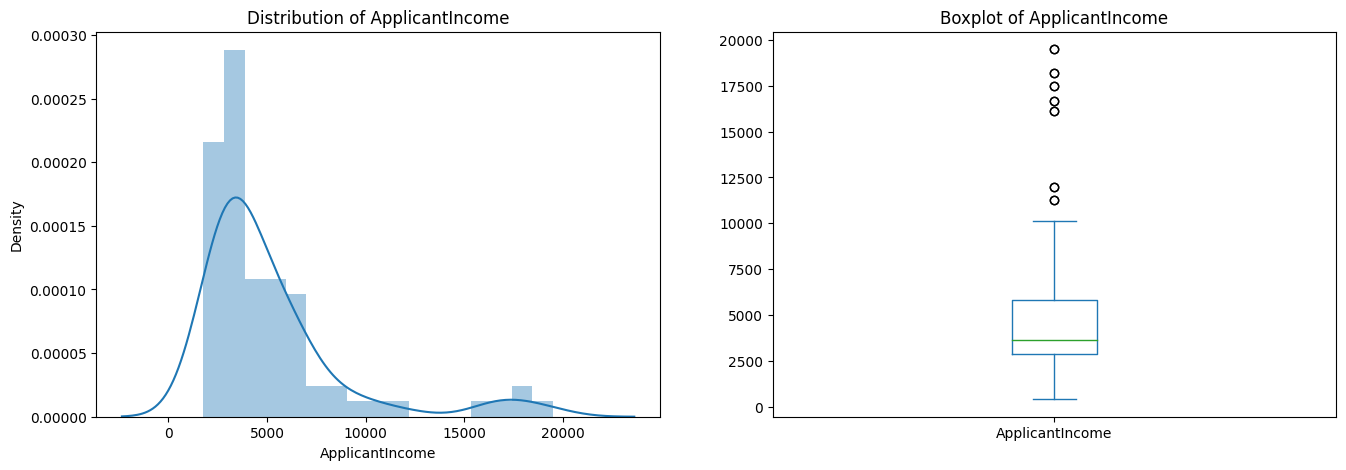

In [9]:
# Create a figure with 1 row and 2 columns
plt.figure(1)

# Subplot 1: Distribution plot for 'ApplicantIncome' after removing NaN values
plt.subplot(121)
removeNA = df.dropna()  # Remove NaN values to enable plotting a density graph
sns.distplot(removeNA['ApplicantIncome'])
plt.title('Distribution of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Density')

# Subplot 2: Box plot for 'ApplicantIncome'
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16, 5))
plt.title('Boxplot of ApplicantIncome')

# Display the plot
plt.show()


# From plots we see there are some outlines

### Check if the gender affects the loan approval

Loan_Status         N         Y
Gender                         
Female       0.333333  0.666667
Male         0.337500  0.662500


<Axes: xlabel='Gender'>

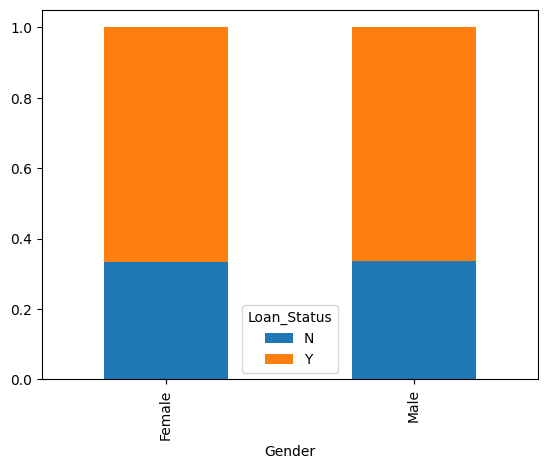

In [10]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'], normalize='index')
print(Gender)
Gender.plot(kind='bar', stacked=True)

**Question 7:**

a. Does gender affect loan approval?

b. Suggest another method to study this relation

Analysis:

a.

No , The approval rates for both females and males are quite close, with no substantial difference. The percentage difference in approval rates between genders is small, suggesting that gender alone may not be a significant factor in determining loan approval.


b.

Yes by Draw a scatter plot to show correlation between gender and loan approval

In [11]:
L=df['Loan_Status'].value_counts()
G=df['Gender'].value_counts()

print('Vlaues of Gender \n {} and for Loan_Status \n {}'.format(L,G))

# Convert to numeric to make scatter plot
dfc=df.copy()
dfc = dfc.dropna()
Loan = {'N':0,'Y':1}
dfc['Loan_Status'] = dfc['Loan_Status'].apply(lambda x: Loan[x])

gg = {'Male':0 , 'Female':1}
dfc['Gender'] = dfc['Gender'].apply(lambda x : gg[x])
L2=dfc['Loan_Status'].value_counts()
G2=dfc['Gender'].value_counts()
print('Vlaues After convert of Gender \n {} and for Loan_Status \n {}'.format(L2,G2))

Vlaues of Gender 
 Y    134
N     68
Name: Loan_Status, dtype: int64 and for Loan_Status 
 Male      160
Female     36
Name: Gender, dtype: int64
Vlaues After convert of Gender 
 1    112
0     48
Name: Loan_Status, dtype: int64 and for Loan_Status 
 0    132
1     28
Name: Gender, dtype: int64


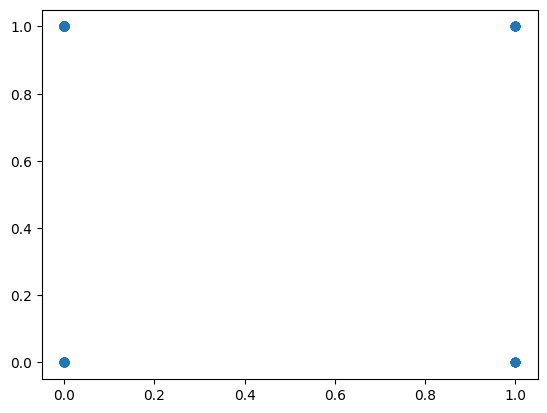

In [12]:
#Another method to study this relation
plt.scatter(dfc['Gender'],dfc['Loan_Status'])
plt.show()

# 5. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: normalize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns
Here we will drop some columns we beleive they do not affect the loan approval.

In [13]:
df.drop(['Loan_ID','Gender','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term'], inplace=True, axis=1)

##Convert continous data into categorical

In [14]:
df['Credit_History'] = df['Credit_History'].astype('O')

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continous data with mean


In [15]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

## Check if any null value exist

**Question 8:** Write the code to check for any null values




In [16]:
df.isnull().sum()
# No null value ; Becuse we remove it previously by .dropna()

Married              0
Dependents           0
Education            0
CoapplicantIncome    0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encode categorical data

In [17]:
le = LabelEncoder()
cat_data=df[['Credit_History','Dependents','Education','Married','Property_Area','Loan_Status']]
num_data=df[['CoapplicantIncome']]
cat_data.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1.0,0,Graduate,Yes,Semiurban,N
1,1.0,0,Graduate,No,Rural,N
2,1.0,3+,Graduate,Yes,Rural,Y
3,1.0,2,Graduate,Yes,Semiurban,Y
4,0.0,0,Not Graduate,Yes,Semiurban,N


In [18]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data.head()

<ipython-input-18-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-18-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-18-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1,0,0,1,1,0
1,1,0,0,0,0,0
2,1,3,0,1,0,1
3,1,2,0,1,1,1
4,0,0,1,1,1,0


## Combine both cat_data and numerical_data

In [19]:
df = pd.concat([cat_data, num_data], axis=1)
df.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
0,1,0,0,1,1,0,6666
1,1,0,0,0,0,0,3666
2,1,3,0,1,0,1,3428
3,1,2,0,1,1,1,1632
4,0,0,1,1,1,0,1800


## Normalization

**Question 9:** Normalize data ranges for all features (e.g., between 0 and 1)

In [20]:
# Normalize = all value between 0 and 1 , by divided it from max
df= df.divide(df.max())
df.head(8)

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
0,1.0,0.000000,0.0,1.0,0.5,0.0,0.159983
1,1.0,0.000000,0.0,0.0,0.0,0.0,0.087983
2,1.0,1.000000,0.0,1.0,0.0,1.0,0.082271
3,1.0,0.666667,0.0,1.0,0.5,1.0,0.039168
4,0.0,0.000000,1.0,1.0,0.5,0.0,0.043200
5,1.0,0.000000,0.0,0.0,0.5,0.0,0.045960
6,1.0,0.000000,1.0,0.0,0.0,0.0,0.000000
7,1.0,0.666667,1.0,1.0,0.5,1.0,0.041808


# 6. Training & Validating

We split the data between training and testing.
Then, we train a model to predict the loan status

In [21]:
input_variables = ['Credit_History','Dependents','Education','Married','Property_Area','CoapplicantIncome']
x = df[input_variables]
y = df['Loan_Status']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size =0.3)

##Creating & Fitting the model

In [31]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##Validating the model

In [23]:
pred_val = model.predict(x_val)
accuracy_score(y_val,pred_val)

0.8852459016393442